#### **6-7. Decision Tree**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

credit=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/credit_final.csv')
credit.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [2]:
from sklearn.model_selection import train_test_split

x = credit.iloc[:,1:]
y = credit['credit.rating']

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(700, 20) (300, 20) (700,) (300,)


In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier (max_depth =5)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred = clf.predict(x_test)

print(confusion_matrix (y_test, pred))
print('정확도: %.2f%%' %(accuracy_score (y_test, pred)*100))
print('정밀도: %.2f%%' %(precision_score (y_test, pred)*100))
print('재현율: %.2f%%' %(recall_score (y_test, pred)*100))
print('F1: %.2f%%' %(f1_score (y_test, pred)*100))

[[ 28  62]
 [ 25 185]]
정확도: 71.00%
정밀도: 74.90%
재현율: 88.10%
F1: 80.96%


In [5]:
from sklearn.metrics import classification_report
report = classification_report (y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.31      0.39        90
           1       0.75      0.88      0.81       210

    accuracy                           0.71       300
   macro avg       0.64      0.60      0.60       300
weighted avg       0.68      0.71      0.68       300



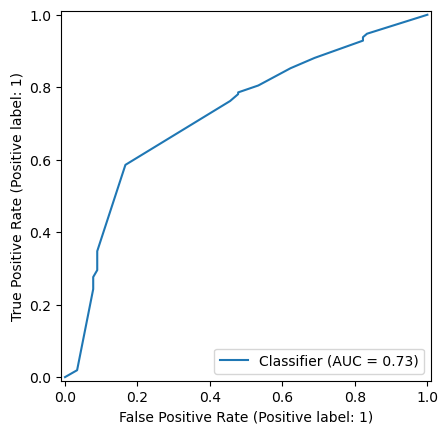

AUC score:  0.7264285714285714


In [6]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# 모델 예측
y_pred_proba = clf.predict_proba(x_test)[:, 1]

RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.show()

auc = roc_auc_score(y_test, y_pred_proba)
print('AUC score: ', auc)

In [7]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(x.columns)
feature_importances = pd.concat ([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm','imporatance']
print(feature_importances)

                        feature_nm  imporatance
0                  account.balance     0.263282
1           credit.duration.months     0.187908
2   previous.credit.payment.status     0.123825
3                   credit.purpose     0.059083
4                    credit.amount     0.098532
5                          savings     0.053080
6              employment.duration     0.000000
7                 installment.rate     0.000000
8                   marital.status     0.013993
9                        guarantor     0.000000
10              residence.duration     0.020960
11                  current.assets     0.000000
12                             age     0.123669
13                   other.credits     0.034003
14                  apartment.type     0.021665
15                    bank.credits     0.000000
16                      occupation     0.000000
17                      dependents     0.000000
18                       telephone     0.000000
19                  foreign.worker     0

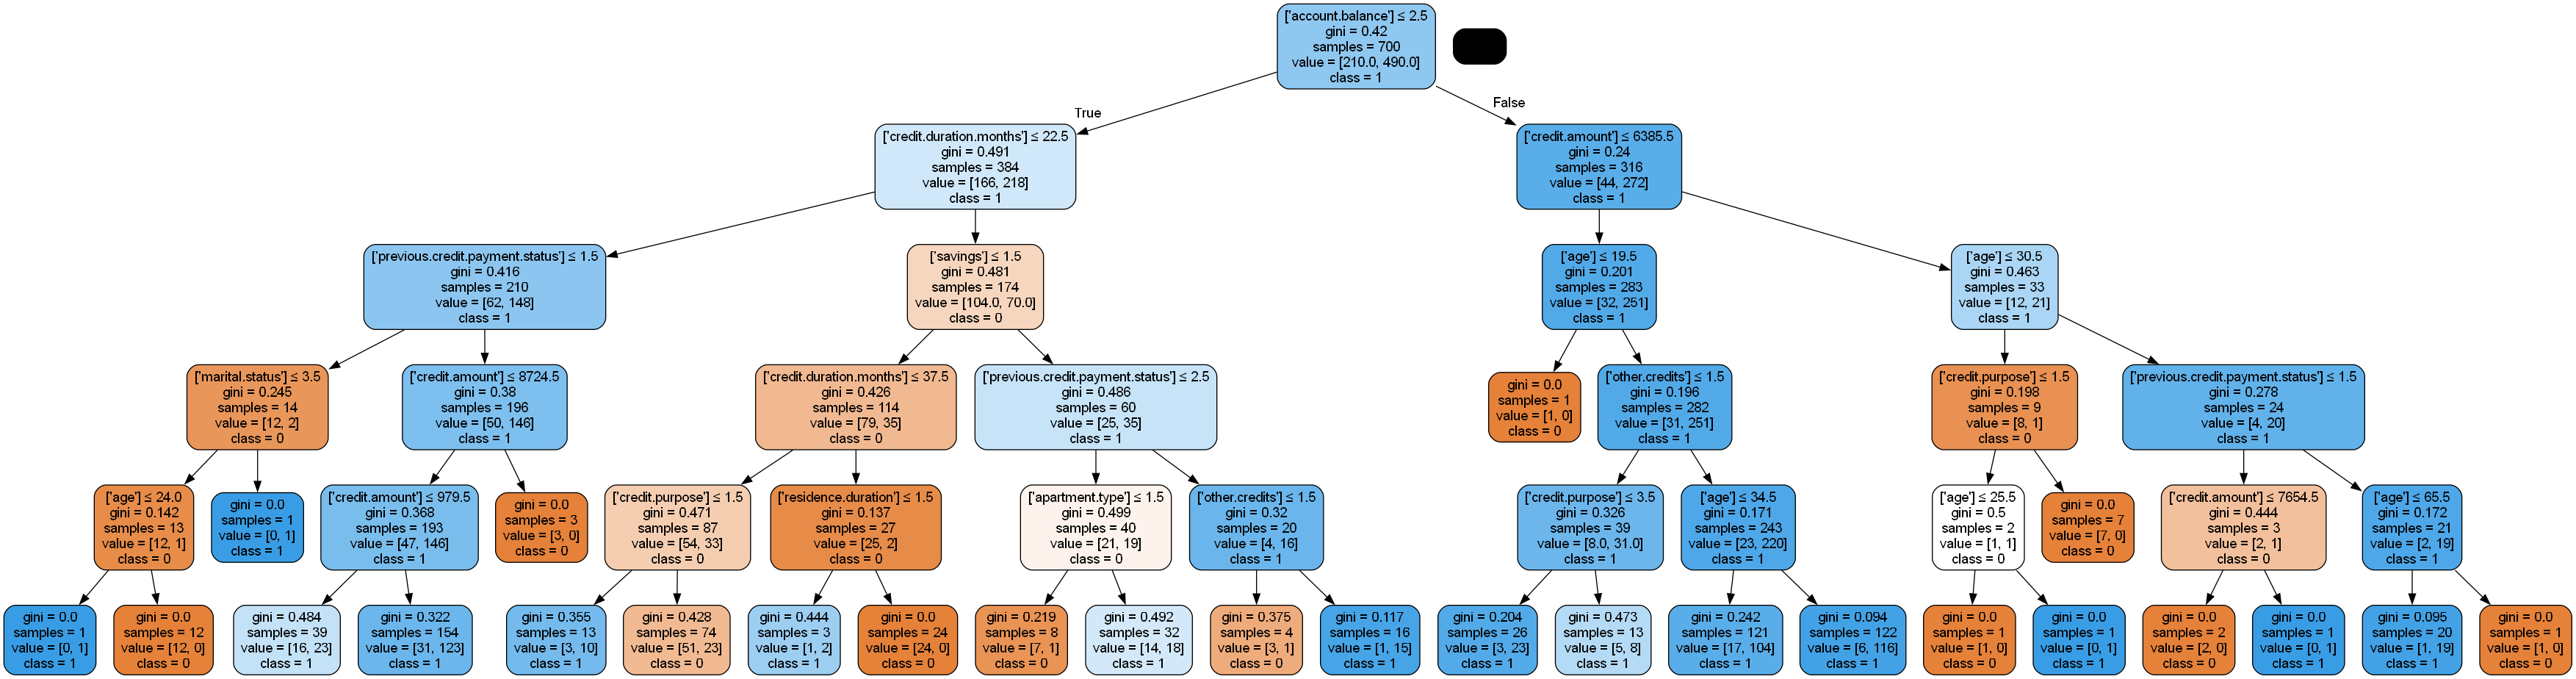

In [8]:
feature_names = column_nm
target_names = np.array(['0','1'])

#import pydot
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
dt_dot_data = export_graphviz (clf, feature_names = column_nm, class_names = target_names, \
                                filled = True, rounded=True, special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

from IPython.display import Image
Image(dt_graph.create_png())

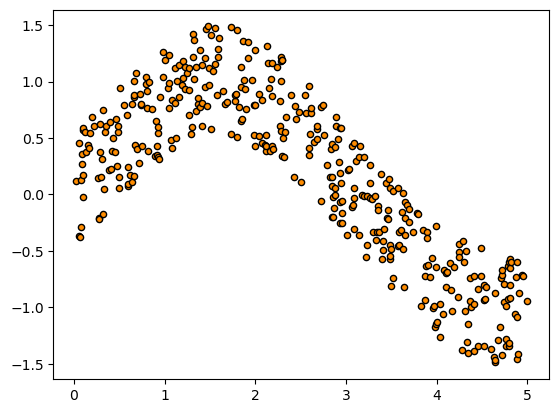

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.sort(5*np.random.rand(400,1), axis=0)
t = np.linspace(0,5,500)[:,np.newaxis]
y = np.sin(x).ravel()

y[::1]+=1*(0.5-np.random.rand(400))
plt.scatter(x,y,s=20,edgecolor='black', c='darkorange',label='data')

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(280, 1) (120, 1) (280,) (120,)


In [13]:
from sklearn.tree import DecisionTreeRegressor

regr_1=DecisionTreeRegressor(max_depth=2)
regr_2=DecisionTreeRegressor(max_depth=5)

regr_1.fit (x_train, y_train)
regr_2.fit (x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [16]:
regr_1_pred=regr_1.predict(x_test)
regr_2_pred=regr_2.predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

preds = [regr_1_pred, regr_2_pred]
max_depths = ['max depth = 2','max depth = 5']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame (index=max_depths, columns=evls)

for pred, nm in zip(preds,max_depths):
    mse=mean_squared_error(y_test,pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    mae=mean_absolute_error(y_test,pred)

    results.loc[nm, 'mse']=round(mse,2)
    results.loc[nm, 'rmse']=round(rmse,2)
    results.loc[nm, 'mae']=round(mae,2)

results

,mse,rmse,mae
max depth = 2,0.12,0.35,0.29
max depth = 5,0.12,0.35,0.3


#### **6-8-1. Ensemble: Bagging**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

breast=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/breast-cancer.csv')
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='diagnosis', ylabel='count'>

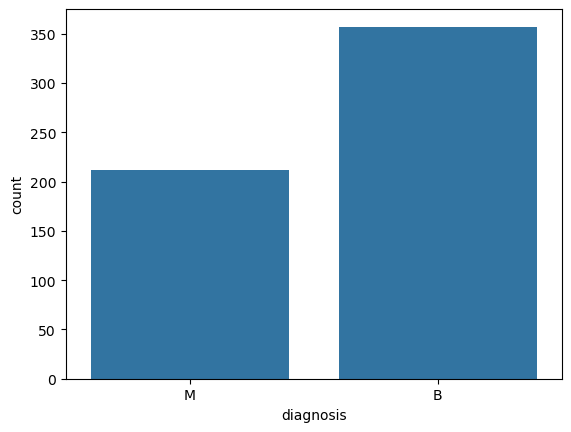

In [19]:
plt.figure()
sns.countplot(x='diagnosis',data=breast)


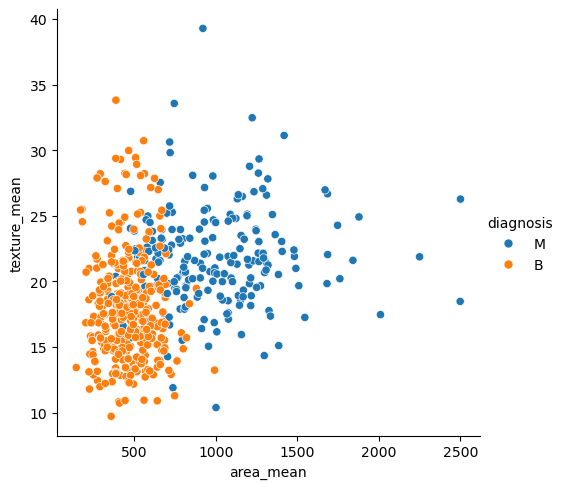

In [20]:
sns.relplot(x='area_mean', y='texture_mean', hue='diagnosis', data=breast)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

breast['diagnosis']=np.where(breast['diagnosis']=='M',1,0)
x = breast [['area_mean','area_worst']]
y = breast ['diagnosis']

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier (estimator = DecisionTreeClassifier())  # 입력하지 않아도 의사결정나무를 default로 사용하기에 안 넣어도 됨
pred = clf.fit(x_train, y_train).predict(x_test)
print ('Accuracy: %.2f%%' %(clf.score(x_test, y_test)*100))

Accuracy: 91.23%


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print(confusion_matrix (y_test, pred))
print('정확도: %.2f%%' %(accuracy_score (y_test, pred)*100))
print('정밀도: %.2f%%' %(precision_score (y_test, pred)*100))
print('재현율: %.2f%%' %(recall_score (y_test, pred)*100))
print('F1: %.2f%%' %(f1_score (y_test, pred)*100))

[[101   6]
 [  9  55]]
정확도: 91.23%
정밀도: 90.16%
재현율: 85.94%
F1: 88.00%


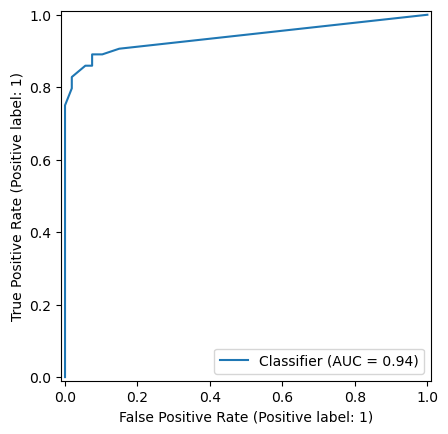

AUC score:  0.939617406542056


In [24]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# 모델 예측
y_pred_proba = clf.predict_proba(x_test)[:, 1]

RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.show()

auc = roc_auc_score(y_test, y_pred_proba)
print('AUC score: ', auc)

In [25]:
clf_oob= BaggingClassifier (estimator = DecisionTreeClassifier(), oob_score=True) 
oob=clf_oob.fit(x,y).oob_score_
print(oob)

0.9173989455184535


C:\Users\sunwa\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:875: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\sunwa\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:881: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [26]:
import pandas as pd
import numpy as np

car=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/CarPrice_Assignment.csv')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [27]:
car_num = car.select_dtypes (['number'])
features = list (car_num.columns.difference (['car_ID','symboling', 'price']))
x=car_num [features]
y=car_num ['price']
print (x.shape, y.shape)

(205, 13) (205,)


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

reg = BaggingRegressor (estimator = DecisionTreeRegressor(), oob_score=True) 
oob= reg.fit(x,y).oob_score_
print (oob)

0.8973527799836017


C:\Users\sunwa\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


#### **6-8-2. Ensemble: Boosting**

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

breast=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/breast-cancer.csv')

breast['diagnosis']=np.where(breast['diagnosis']=='M',1,0)
x = breast [['area_mean','area_worst']]
y = breast ['diagnosis']

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [32]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier (estimator = None) 
pred = clf.fit(x_train, y_train).predict(x_test)
print ('Accuracy: %.2f%%' %(clf.score(x_test, y_test)*100))

Accuracy: 93.57%


C:\Users\sunwa\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print(confusion_matrix (y_test, pred))
print('정확도: %.2f%%' %(accuracy_score (y_test, pred)*100))
print('정밀도: %.2f%%' %(precision_score (y_test, pred)*100))
print('재현율: %.2f%%' %(recall_score (y_test, pred)*100))
print('F1: %.2f%%' %(f1_score (y_test, pred)*100))

[[105   2]
 [  9  55]]
정확도: 93.57%
정밀도: 96.49%
재현율: 85.94%
F1: 90.91%


In [44]:
importances = clf.feature_importances_
features = pd.DataFrame(['area_mean','texture_mean'])
pd.concat ([features, pd.DataFrame(importances)], axis=1)

print('<Importances>')
print('area_mean:', importances[0], '   texture_mean:', importances[1])

<Importances>
area_mean: 0.42    texture_mean: 0.58


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

car=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/CarPrice_Assignment.csv')
car_num = car.select_dtypes (['number'])
features = list (car_num.columns.difference (['car_ID','symboling', 'price']))
x=car_num [features]
y=car_num ['price']

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 13) (62, 13) (143,) (62,)


In [55]:
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor (estimator = None)
pred = reg.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

print('mse= %.2f' %mean_squared_error(y_test,pred))
print('rmse= %.2f' %np.sqrt(mean_squared_error(y_test,pred)))
print('mae= %.2f' %mean_absolute_error(y_test,pred))
print('accuracy= %.2f%%' %(reg.score(x_test,y_test)*100))

mse= 5454122.68
rmse= 2335.41
mae= 1834.28
accuracy= 90.97%


In [56]:
importances = reg.feature_importances_
pd.concat ([pd.DataFrame(features), pd.DataFrame(importances)], axis=1)

,0,0
0,boreratio,0.016361
1,carheight,0.005884
2,carlength,0.007951
3,carwidth,0.074396
4,citympg,0.004591
5,compressionratio,0.003478
6,curbweight,0.082115
7,enginesize,0.628839
8,highwaympg,0.059415
9,horsepower,0.065119


Text(0.5, 0, 'importances')

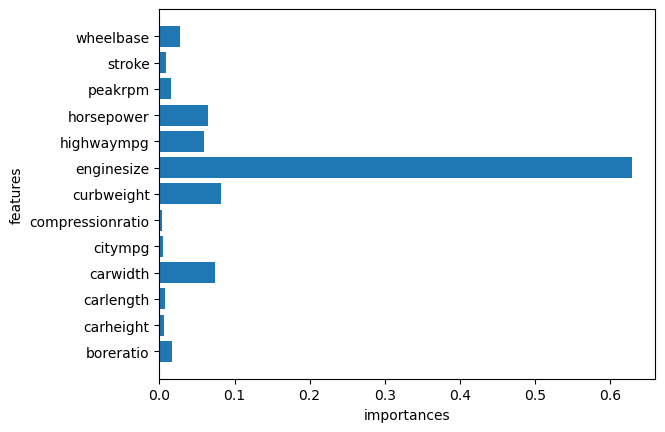

In [77]:
plt.barh(range(len(features)),importances, align='center')
plt.yticks(range(len(features)), features)
plt.ylabel('features')
plt.xlabel('importances')

#### **6-8-3. Ensemble: Random Forest**

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

breast=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/breast-cancer.csv')

breast['diagnosis']=np.where(breast['diagnosis']=='M',1,0)
x = breast [['area_mean','area_worst']]
y = breast ['diagnosis']

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [79]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, min_samples_split = 5) 
pred = clf.fit(x_train, y_train).predict(x_test)
print ('Accuracy: %.2f%%' %(clf.score(x_test, y_test)*100))

Accuracy: 92.40%


In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print(confusion_matrix (y_test, pred))
print('정확도: %.2f%%' %(accuracy_score (y_test, pred)*100))
print('정밀도: %.2f%%' %(precision_score (y_test, pred)*100))
print('재현율: %.2f%%' %(recall_score (y_test, pred)*100))
print('F1: %.2f%%' %(f1_score (y_test, pred)*100))

[[103   4]
 [  9  55]]
정확도: 92.40%
정밀도: 93.22%
재현율: 85.94%
F1: 89.43%


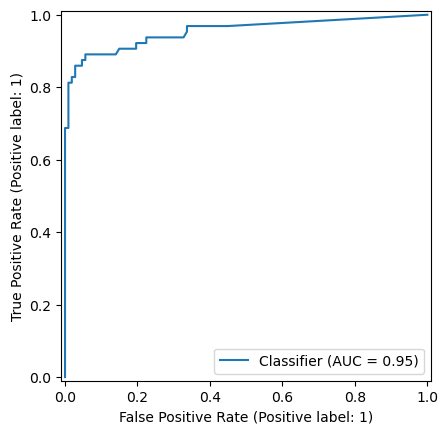

AUC score:  0.9541471962616822


In [81]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# 모델 예측
y_pred_proba = clf.predict_proba(x_test)[:, 1]

RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.show()

auc = roc_auc_score(y_test, y_pred_proba)
print('AUC score: ', auc)

In [83]:
importances = clf.feature_importances_

print('<Importances>')
print('area_mean:', importances[0], '   texture_mean:', importances[1])

<Importances>
area_mean: 0.4662005092318003    texture_mean: 0.5337994907681998


In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

car=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/CarPrice_Assignment.csv')
car_num = car.select_dtypes (['number'])
features = list (car_num.columns.difference (['car_ID','symboling', 'price']))
x=car_num [features]
y=car_num ['price']

x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 13) (62, 13) (143,) (62,)


In [85]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor ()
pred = reg.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

print('mse= %.2f' %mean_squared_error(y_test,pred))
print('rmse= %.2f' %np.sqrt(mean_squared_error(y_test,pred)))
print('mae= %.2f' %mean_absolute_error(y_test,pred))
print('accuracy= %.2f%%' %(reg.score(x_test,y_test)*100))

mse= 4096372.34
rmse= 2023.95
mae= 1326.22
accuracy= 93.21%


In [86]:
importances = reg.feature_importances_
pd.concat ([pd.DataFrame(features), pd.DataFrame(importances)], axis=1)

,0,0
0,boreratio,0.004779
1,carheight,0.004051
2,carlength,0.007377
3,carwidth,0.021301
4,citympg,0.013159
5,compressionratio,0.003562
6,curbweight,0.196047
7,enginesize,0.639095
8,highwaympg,0.065053
9,horsepower,0.017872


Text(0.5, 0, 'importances')

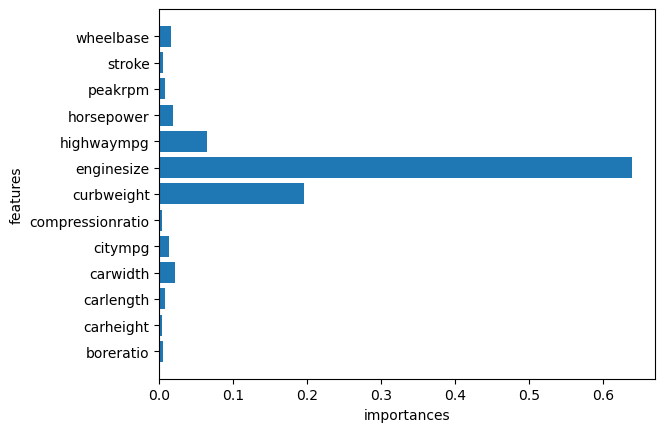

In [87]:
plt.barh(range(len(features)),importances, align='center')
plt.yticks(range(len(features)), features)
plt.ylabel('features')
plt.xlabel('importances')